In [1]:
import math
import timeit
import numpy as np
import scipy.special

import matplotlib.pyplot as plt

In [2]:
def exp_norm_chi_a(k: float) -> float:
    return math.sqrt(k) * (1. - 1. / (4. * k) + 1. / (21. * k * k))

def exp_norm_chi_b(k: float) -> float:
    tmp = k * 0.5
    return math.sqrt(2.) * scipy.special.gamma(tmp + 0.5) / scipy.special.gamma(tmp)

def empirical(k):
    mean = np.zeros(k)
    cov = np.eye(k)
    Zs = np.random.default_rng().multivariate_normal(mean, cov, 10000000)
    Xs = np.linalg.norm(Zs, axis=1)
    return np.mean(Xs)

In [3]:
%timeit exp_norm_chi_a(10.)

611 ns ± 48.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
print('Approximation a: ', exp_norm_chi_a(10))

Approximation a:  3.0847265651690123


In [5]:
%timeit exp_norm_chi_b(10.)

3.33 µs ± 23.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
print('Approximation b: ', exp_norm_chi_b(10))

Approximation b:  3.084327759799864


In [7]:
def collect_empirical_data(n: int, k: float):
    return np.array([empirical(k) for _ in range(n)])

In [8]:
def compute_comparison_data():
    emp_mean = []
    emp_std = []
    val_a = []
    val_b = []
    for k in range(2, 11):
        samples = collect_empirical_data(10, k)
        emp_mean.append(np.mean(samples))
        emp_std.append(np.std(samples))
        val_a.append(exp_norm_chi_a(k))
        val_b.append(exp_norm_chi_b(k))

    return emp_mean, emp_std, val_a, val_b

In [9]:
emp_mean, emp_std, val_a, val_b = compute_comparison_data()

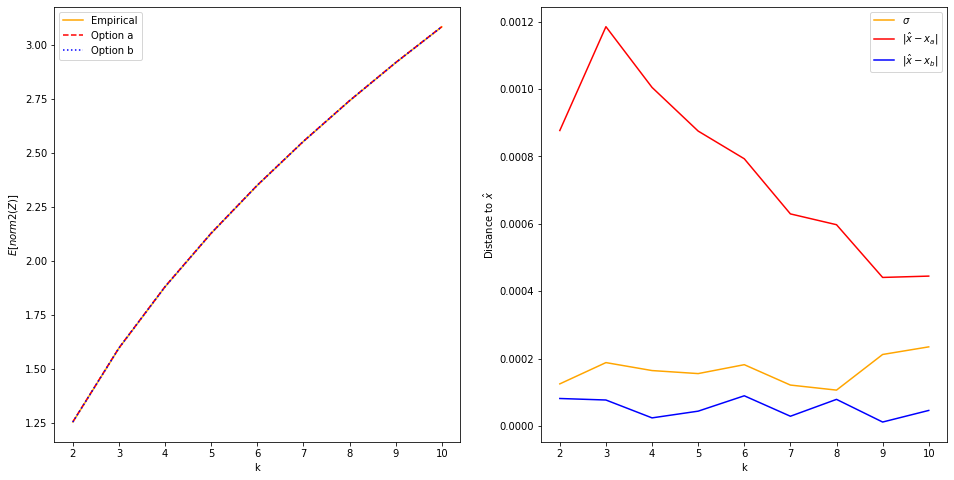

In [10]:
def produce_plot(emp_mean, emp_std, val_a, val_b):
    emp_mean = np.array(emp_mean)
    emp_std = np.array(emp_std)
    val_a = np.array(val_a)
    val_b = np.array(val_b)

    ks = np.arange(2, 11)
    fig = plt.figure(figsize=(16,8))
    ax = plt.subplot(1, 2, 1)
    
    ax.plot(ks, emp_mean, linestyle='-', color='orange', label='Empirical')
    ax.fill_between(ks, emp_mean - emp_std, emp_mean + emp_std, alpha=0.10, color='orange')
    ax.plot(ks, val_a, linestyle='--', color='red', label='Option a')
    ax.plot(ks, val_b, linestyle=':', color='blue', label='Option b')
    ax.set_xlabel('k')
    ax.set_ylabel('$E[norm2(Z)]$')
    ax.legend()
    
    ax = plt.subplot(1, 2, 2)
    ax.plot(ks, emp_std, color='orange', label='$\sigma$')
    ax.plot(ks, np.abs(val_a - emp_mean), color='red', label='$|\hat{x} - x_a|$')
    ax.plot(ks, np.abs(val_b - emp_mean), color='blue', label='$|\hat{x} - x_b|$')
    ax.set_xlabel('k')
    ax.set_ylabel('Distance to $\hat{x}$')
    ax.legend()
    
    return fig

_ = produce_plot(emp_mean, emp_std, val_a, val_b)

In [2]:
from anguilla.util import exp_norm_chi

In [3]:
%timeit exp_norm_chi(10)

3.51 µs ± 50.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
exp_norm_chi?

Signature: exp_norm_chi(k: float) -> float
Docstring:
Approximate the expectation of a random variable defined as         the 2-norm of another sampled from a k-dimensional             multivariate Gaussian distribution.

Parameters
----------
k
    The dimensionality of the multivariate Gaussian distribution.

Returns
-------
    An approximation of said expectation.

Notes
-----
The formula is presented in p. 28 of :cite:`2016:cma-es-tutorial`:

.. math::
    \mathbb{E} [ ||Z|| ] = \sqrt{2}         \Gamma \left( \frac{k+1}{2} \right)         / \Gamma \left( \frac{k}{2} \right) \approx \sqrt{k}             \left(1 + \frac{k+1}{2} + \frac{1}{21 k^2} \right)

where

.. math::
    Z \sim N(0, I_k)

If Scipy is available, use its gamma function implementation to         compute the approximation.
File:      /workspaces/anguilla-aeldgc/anguilla/util.py
Type:      function
